In [9]:
%load_ext autoreload
%autoreload 2
from autoseg.config import read_config
from autoseg.models import Model
import torch
import numpy as np
import matplotlib.pyplot as plt
import math
from thop import profile
from torchinfo import summary
import pandas as pd

millnames = ['',' Thousand',' Million',' Billion',' Trillion']

def millify(n):
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))

    return '{:.1f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

def stats(model, q=True, inp=None):
  summ = summary(model, (1, 1, 54, 268, 268) if inp is None else inp, device=torch.device("cuda:1"), verbose=0, depth=5)
  if not q:
    print(f"FLOPs: {millify(summ.total_mult_adds)}")
    print(f"Params: {millify(su.total_params)}")
  return {
    "flop": millify(summ.total_mult_adds),
    "params": millify(summ.total_params)
  } 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
config = read_config("autoseg/user_configs/anton/unext/shallow")
model = Model(config)
model = model.to("cuda:1")
#inp = torch.randn((1, 1, 54, 268, 268)).to("cuda:1")
#model(inp)[0].shape
stats(model)

unext
Output shapes [3]


{'flop': '326.4 Billion', 'params': '73.0 Million'}

In [5]:
config = read_config("autoseg/user_configs/anton/baselines/unet")
model = Model(config)
model = model.to("cuda:1")
inp = torch.randn((1, 1, 54, 268, 268)).to("cuda:1")
model(inp)[0].shape
stats(model)

[[1, 27, 27], [1, 9, 9], [1, 3, 3]]


{'flop': '235.1 Billion', 'params': '87.8 Million'}

In [12]:
config = read_config("autoseg/user_configs/anton/unetr/unetr4")
model = Model(config)
model = model.to("cuda:1")
inp = torch.randn((1, 1, 128, 128, 128)).to("cuda:1")
model(inp)[0].shape
#stats(model)

Output shapes [3]
1 768 [64, 272, 272] [16, 16, 16]


torch.Size([1, 512, 8, 34, 34]) torch.Size([1, 512, 6, 32, 32]) torch.Size([1, 512, 6, 32, 32])


RuntimeError: Calculated padded input size per channel: (2 x 28 x 28). Kernel size: (3 x 3 x 3). Kernel size can't be greater than actual input size

In [5]:
df = pd.DataFrame(columns=["Model", "FLOPs", "Params"])
for c in ["unet", "unet_large", "unext", "unext6", "unext8", "unext11", "unext112", "unext113", "unext114"]:
  if "unext" in c:
    config = read_config("autoseg/user_configs/anton/unext/" + c)
  else:
    config = read_config("autoseg/user_configs/anton/baselines/" + c)
  model = Model(config)
  s = stats(model)
  df.loc[len(df.index)] = [c, s["flop"], s["params"]]

config = read_config("autoseg/user_configs/anton/baselines/unetr")
model = Model(config)
s = stats(model, inp=(1, 1, 48, 272, 272))
df.loc[len(df.index)] = ["unetr", s["flop"], s["params"]]

df

[[1, 27, 27], [1, 9, 9], [1, 3, 3]]
[[1, 16, 16], [1, 8, 8], [1, 4, 4], [1, 2, 2]]
unext
Output shapes [3]
<module 'autoseg.models.unets.unext.experiments' from '/home/anton/github/autoseg/src/autoseg/models/unets/unext/experiments/__init__.py'>
loading 1
False
unext
Output shapes [3]
<module 'autoseg.models.unets.unext.experiments' from '/home/anton/github/autoseg/src/autoseg/models/unets/unext/experiments/__init__.py'>
loading 6
{'in_channels': 1, 'num_fmaps': 12, 'fmap_inc_factor': 5}
False
unext5
unext
Output shapes [3]
<module 'autoseg.models.unets.unext.experiments' from '/home/anton/github/autoseg/src/autoseg/models/unets/unext/experiments/__init__.py'>
loading 8
{'in_channels': 1, 'num_fmaps': 12, 'fmap_inc_factor': 5}
False
unext
Output shapes [3]
<module 'autoseg.models.unets.unext.experiments' from '/home/anton/github/autoseg/src/autoseg/models/unets/unext/experiments/__init__.py'>
loading 11
{'in_channels': 1, 'num_fmaps': 12, 'fmap_inc_factor': 5}
False
unext
Output shapes

,Model,FLOPs,Params
0,unet,235.1 Billion,87.8 Million
1,unet_large,1.7 Trillion,197.0 Million
2,unext,204.2 Billion,21.9 Million
3,unext6,326.4 Billion,73.1 Million
4,unext8,665.7 Billion,73.0 Million
5,unext11,4.1 Trillion,73.0 Million
6,unext112,4.1 Trillion,73.0 Million
7,unext113,4.1 Trillion,72.9 Million
8,unext114,3.9 Trillion,70.4 Million
9,unetr,3.7 Trillion,146.9 Million


In [19]:
config = read_config("autoseg/user_configs/anton/baselines/unet/1")
model = Model(config)
model = model.to("cuda:1")
stats(model)

[[1, 27, 27], [1, 9, 9], [1, 3, 3]]
FLOPs: 235 Billion
Params: 88 Million


{'flop': '235 Billion', 'params': '88 Million'}

In [41]:
config = read_config("autoseg/user_configs/anton/baselines/unetr/1")
model = Model(config)
stats(model, inp=(1, 1, 48, 272, 272))

Output shapes [3]
1 768 [48, 272, 272] 16


{'flop': '4 Trillion', 'params': '147 Million'}

In [23]:
config = read_config("autoseg/user_configs/anton/baselines/unet_large")
model = Model(config)
model.to("cuda:1")
stats(model)

[[1, 16, 16], [1, 8, 8], [1, 4, 4], [1, 2, 2]]
FLOPs: 2 Trillion
Params: 197 Million


'197 Million'

In [30]:
config = read_config("autoseg/user_configs/anton/baselines/unext")
model = Model(config)
model.to("cuda:1")
stats(model)

unext
Output shapes [3]
functools.partial(<class 'autoseg.models.unets.unext.unext.UNeXt'>, ConvPass=<class 'autoseg.models.unets.unext.unext1.ConvPass'>)
False
FLOPs: 204 Billion
Params: 22 Million


{'flop': '204 Billion', 'params': '22 Million'}

73086207

In [3]:
from autoseg.datasets import GunpowderZarrDataset
from torch.utils.data import DataLoader
from autoseg.datasets.utils import multisample_collate as collate

dataset = GunpowderZarrDataset(
  config=config["pipeline"],
  input_image_shape=config["model"]["input_image_shape"],
  output_image_shape=config["model"]["output_image_shape"],
)

dataloader = DataLoader(
    dataset=dataset,
    collate_fn=collate,
    batch_size=config["training"]["train_dataloader"]["batch_size"],
    pin_memory=False,
)

dataloader_it = iter(dataloader)
sample_image = next(dataloader_it)
print(sample_image[0].shape)

sample_inp = torch.tensor(sample_image[0].astype(np.float32)).to("cuda:1")

/home/anton/.cache/autoseg/datasets/SynapseWeb/kh2015/data/apical.zarr.zip labels/s1
/home/anton/.cache/autoseg/datasets/SynapseWeb/kh2015/data/apical.zarr.zip labels_mask/s1
/home/anton/.cache/autoseg/datasets/SynapseWeb/kh2015/data/apical.zarr.zip raw/s1
(1, 1, 54, 268, 268)


In [5]:
profile(model, inputs=(sample_inp, ))

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv3d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.ConvTranspose3d'>.


(330563296128.0, 73086207.0)

In [4]:
out = model(sample_inp)

hello
res1 torch.Size([1, 12, 50, 130, 130])
res2 torch.Size([1, 60, 46, 61, 61])
res3 torch.Size([1, 300, 42, 26, 26])
res4 torch.Size([1, 1500, 38, 9, 9])
decoding
post up1
torch.Size([1, 1500, 38, 18, 18])
post enc1
torch.Size([1, 300, 34, 14, 14])
post up2
torch.Size([1, 300, 34, 28, 28])
post enc2
torch.Size([1, 60, 30, 24, 24])
post up3
torch.Size([1, 60, 30, 48, 48])
post enc3
torch.Size([1, 12, 26, 44, 44])


In [5]:
out[0].shape

torch.Size([1, 3, 22, 40, 40])

In [9]:
model

Model(
  (model): ConfigurableUNeXt(
    (unet): UNeXt(
      (enc1): Sequential(
        (0): Conv3d(1, 12, kernel_size=(1, 1, 1), stride=(1, 1, 1))
        (1): ConvPass(
          (conv1): Conv3d(12, 12, kernel_size=(5, 5, 5), stride=(1, 1, 1), padding=same, groups=12)
          (act1): GELU(approximate='none')
          (conv2): Conv3d(12, 48, kernel_size=(1, 1, 1), stride=(1, 1, 1))
          (act2): GELU(approximate='none')
          (conv3): Conv3d(48, 12, kernel_size=(1, 1, 1), stride=(1, 1, 1))
          (act3): GELU(approximate='none')
        )
        (2): ConvPass(
          (conv1): Conv3d(12, 12, kernel_size=(5, 5, 5), stride=(1, 1, 1), padding=same, groups=12)
          (act1): GELU(approximate='none')
          (conv2): Conv3d(12, 48, kernel_size=(1, 1, 1), stride=(1, 1, 1))
          (act2): GELU(approximate='none')
          (conv3): Conv3d(48, 12, kernel_size=(1, 1, 1), stride=(1, 1, 1))
          (act3): GELU(approximate='none')
        )
        (3): ConvPass(
   

In [14]:
raw_img = sample_image[0][0][0][24]

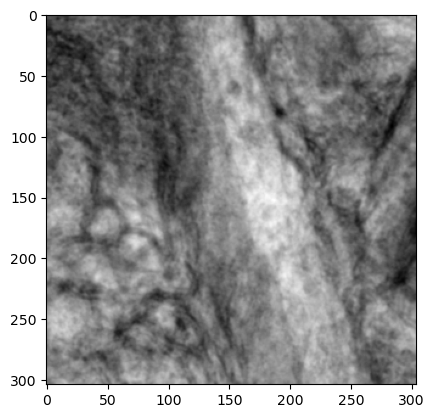

In [14]:
d3_raw_img = np.sum(sample_image[0][0][0][16:32], axis=0) / 16
d3_raw_img.shape
plt.imshow(d3_raw_img, cmap="gray")

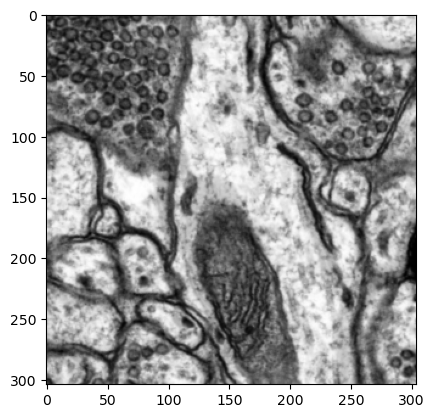

In [15]:
import matplotlib.pyplot as plt
plt.imshow(raw_img, cmap="gray")

In [16]:
raw = torch.tensor(sample_image[0])
raw = raw.to("cuda")
raw.shape

torch.Size([1, 1, 76, 304, 304])

In [17]:
208*208*48/(16*16*16)

507.0

In [18]:
model = model.to("cuda")

In [19]:
layer = model.model.unet.transformer.layer[0]

AttributeError: 'UNet' object has no attribute 'transformer'

In [ ]:
layer

In [ ]:
patch_embeddings = model.model.unet.transformer.embeddings.patch_embeddings(raw)

In [ ]:
patch_embeddings.flatten(2).shape

In [ ]:
patch_embeddings.shape

In [ ]:
def to_np(t):
  return t.detach().cpu().numpy()

In [ ]:
patch_embeddings = to_np(patch_embeddings)

In [ ]:
13*16

In [ ]:
# batch, emb_channel, z
plt.imshow(patch_embeddings[0,39,1])

In [ ]:
def patch_to_original_size(patch):
  return patch.repeat(16,axis=0).repeat(16,axis=1)

In [ ]:
from itertools import cycle

In [ ]:
values = cycle([0,1])
overlay = np.array([[next(values) for i in range(13)] for j in range(13)])

In [ ]:
plt.imshow(overlay)

In [ ]:
#plt.imshow(patch_to_original_size(2*patch_embeddings[0,39,1]) + raw_img,cmap="gray")
plt.imshow(patch_to_original_size(overlay) + 12*d3_raw_img,cmap="gray", vmin=d3_raw_img.min()*12, vmax=d3_raw_img.max()*12+1)
#plt.imshow(patch_to_original_size(overlay) + 4*raw_img,cmap="gray")

In [ ]:
plt.imshow(d3_raw_img[0*16:2*16,10*16:12*16], cmap="gray", vmin=d3_raw_img.min(), vmax=d3_raw_img.max())

In [ ]:
#num_heads * emb_dim
12*(768/12)
# (507, 768) * (768)

In [ ]:
embeddings = model.model.unet.transformer.embeddings(raw)

In [ ]:
embeddings.shape

In [ ]:
first_layer_out = layer.attn(layer.attention_norm(embeddings), return_raw_scores=True)


In [ ]:
attn_scores = first_layer_out[2]

In [ ]:
attn_scores = to_np(attn_scores)

In [ ]:
attn_scores.shape

In [ ]:
print(attn_scores.min(), attn_scores.max(), attn_scores.std())

In [ ]:
first_map_attn = attn_scores[0,s:s+c,0]

In [ ]:
torch.unflatten(torch.tensor(first_map_attn),dim=1,sizes=(3,13,13)).numpy().shape

In [ ]:
def attn_for_patch_i(attn,x,y,z):
  i = z*13*13+y*13+x
  p_attn = attn_scores[0,s:s+c,i]
  return np.transpose(torch.unflatten(torch.tensor(p_attn),dim=1,sizes=(3,13,13)).numpy(), (0, 2, 3, 1))

In [ ]:
attn_for_patch_i(attn_scores, 52).shape

In [ ]:
import numpy as np

In [ ]:
z=2
x=6
y=6
#print("Mean attention", attn_for_patch_i(attn_scores, x,y,z)[0,:,:,1].mean())
plt.imshow(attn_for_patch_i(attn_scores, x,y,z)[0,:,:,1], cmap="hot", vmin=-2,vmax=2)

In [ ]:
xs = 4
xe = 8 
ys = 8 
ye = 12
tot_attn = None
ct = 0
for x in range(xs,xe+1):
  for y in range(ys,ye+1):
    ct += 1
    if tot_attn is None:
      tot_attn = attn_for_patch_i(attn_scores, x,y,1)
    else:
      tot_attn += attn_for_patch_i(attn_scores, x,y,1)
tot_attn /= ct

In [ ]:
plt.imshow(d3_raw_img[ys*16:ye*16,xs*16:xe*16], cmap="gray", vmin=d3_raw_img.min(), vmax=d3_raw_img.max())

In [ ]:
# tot std: 0.08
# std only white patch: 0.28
# std white/black patch 0.13
print(tot_attn.min(), tot_attn.max(), tot_attn.std())

In [ ]:
plt.imshow(tot_attn[0,:,:,1], cmap="hot", vmin=-2,vmax=2)